# Employee promotion dataset

### I am going to perform 4 machine learning model to classify weather employee is getting promoted or not. 
#### The model are: 
1. Decision tree
2. Neural Network
3. SVM
4. Logic based programming
5. Reinforcement learning (using env and gym)

#### Lets download the necessary packages required for the project

In [1]:
!pip3 install numpy
!pip3 install pandas
!pip3 install seaborn
!pip3 install matplotlib
!pip3 install imblearn
!pip3 install sklearn
!pip3 install -U keras-tuner

You should consider upgrading via the '/Users/vaishnavbharadwaj/Documents/lectures/mldm_cw/env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/vaishnavbharadwaj/Documents/lectures/mldm_cw/env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/vaishnavbharadwaj/Documents/lectures/mldm_cw/env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/vaishnavbharadwaj/Documents/lectures/mldm_cw/env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/vaishnavbharadwaj/Documents/lectures/mldm_cw/env/bin/python3 -m pip install --upgrade pip' command.


You should consider upgrading via the '/Users/vaishnavbharadwaj/Documents/lectures/mldm_cw/env/bin/python3 -m pip install --upgrade pip' command.
Requirement already up-to-date: keras-tuner in /Users/vaishnavbharadwaj/Documents/lectures/mldm_cw/env/lib/python3.9/site-packages (1.1.2)


You should consider upgrading via the '/Users/vaishnavbharadwaj/Documents/lectures/mldm_cw/env/bin/python3 -m pip install --upgrade pip' command.


In [2]:
# Import data and take a look
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('employee_promotion.csv', na_values=['#NAME?'])

In [5]:
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [6]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [7]:
df = df.drop(['employee_id','region','awards_won'], axis=1)

In [8]:
df.head(5)

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,49.0,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,60.0,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,50.0,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,50.0,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,73.0,0


In [9]:
df.isna().sum()

department                 0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
avg_training_score      2560
is_promoted                0
dtype: int64

## Visulization

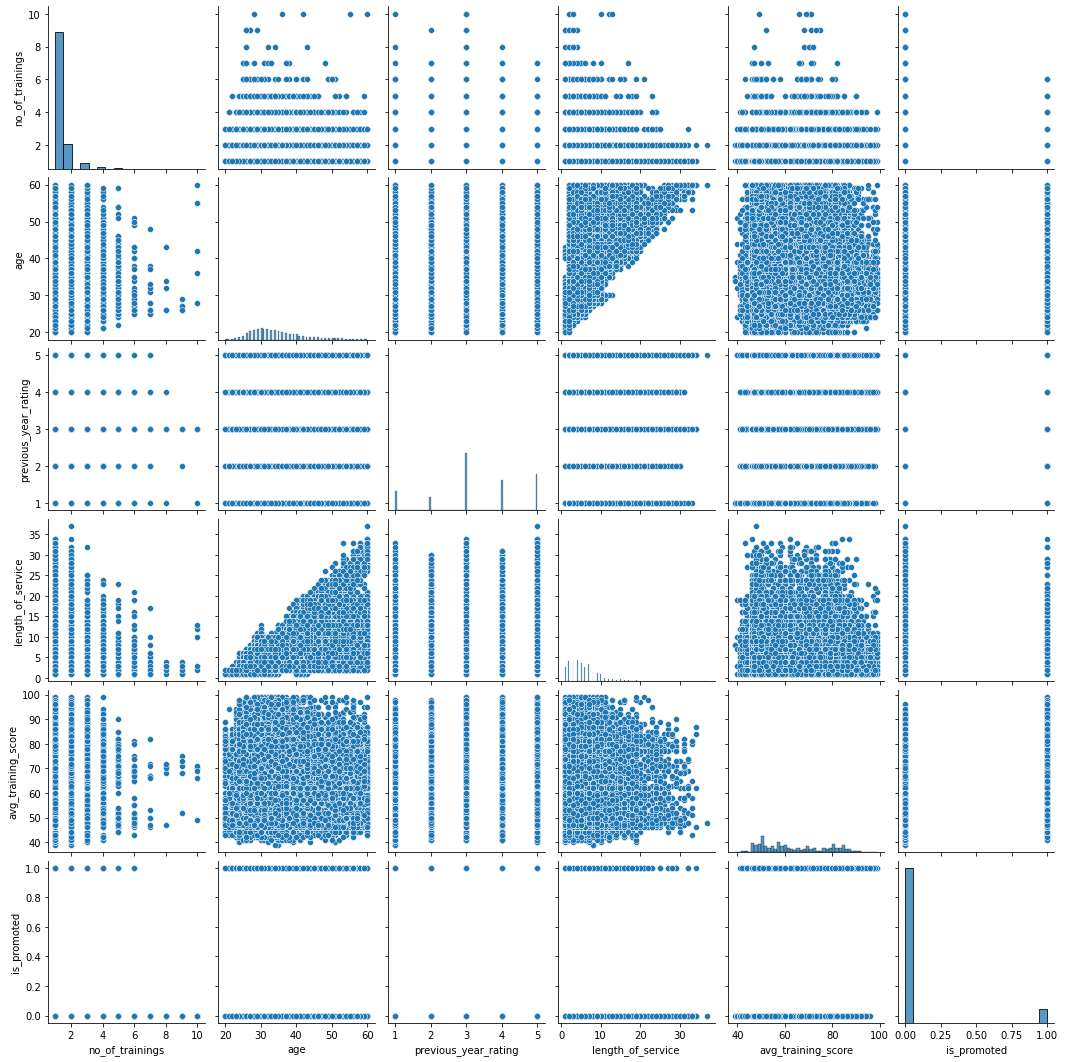

In [10]:
sns.pairplot(df)

In [11]:
df.groupby(['department','education','recruitment_channel'])['previous_year_rating'].count()

department  education         recruitment_channel
Analytics   Bachelor's        other                  1971
                              referred                 70
                              sourcing               1548
            Master's & above  other                   590
                              sourcing                431
                                                     ... 
Technology  Below Secondary   referred                 16
                              sourcing                 49
            Master's & above  other                  1215
                              referred                 45
                              sourcing                924
Name: previous_year_rating, Length: 65, dtype: int64

In [12]:
df.groupby(['department','education'])['length_of_service'].sum()

department         education       
Analytics          Bachelor's          18335
                   Master's & above     6879
Finance            Bachelor's           8397
                   Below Secondary       185
                   Master's & above     3470
HR                 Bachelor's           7467
                   Below Secondary       201
                   Master's & above     5884
Legal              Bachelor's           3433
                   Below Secondary       111
                   Master's & above     1220
Operations         Bachelor's          46116
                   Below Secondary       324
                   Master's & above    25135
Procurement        Bachelor's          24178
                   Below Secondary       216
                   Master's & above    20318
R&D                Bachelor's           2295
                   Master's & above     2192
Sales & Marketing  Bachelor's          61513
                   Master's & above    31354
Technology         

In [13]:
df.groupby(['education','gender'])['no_of_trainings'].count()

education         gender
Bachelor's        f         10854
                  m         25815
Below Secondary   f           289
                  m           516
Master's & above  f          4778
                  m         10147
Name: no_of_trainings, dtype: int64

In [14]:
df.groupby(['education','department'])['avg_training_score'].mean()

education         department       
Bachelor's        Analytics            84.558824
                  Finance              60.115777
                  HR                   50.126531
                  Legal                59.711888
                  Operations           59.982477
                  Procurement          70.067411
                  R&D                  84.607011
                  Sales & Marketing    50.395336
                  Technology           79.980181
Below Secondary   Finance              59.511905
                  HR                   49.967742
                  Legal                60.207547
                  Operations           59.525974
                  Procurement          69.775194
                  Technology           80.174129
Master's & above  Analytics            84.740598
                  Finance              60.268793
                  HR                   50.377305
                  Legal                59.638889
                  Operations     

In [15]:
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,49.0,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,60.0,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,50.0,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,50.0,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,73.0,0


<AxesSubplot:xlabel='department', ylabel='count'>

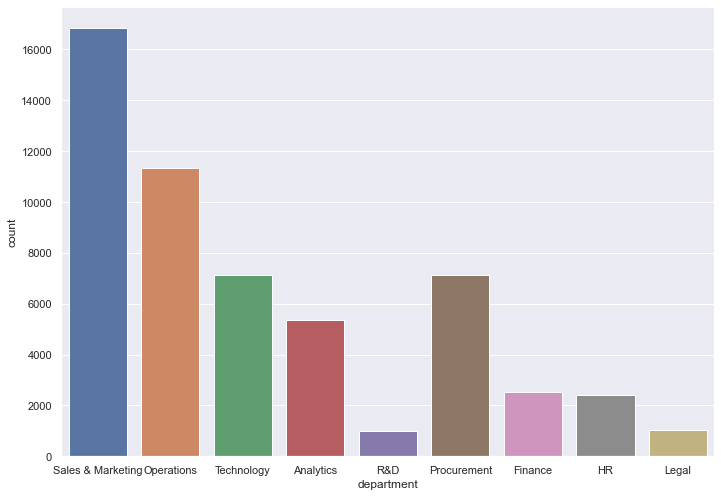

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x="department", data=df)

<AxesSubplot:xlabel='education', ylabel='count'>

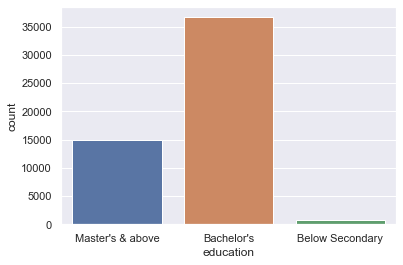

In [17]:
sns.set(rc={'figure.figsize':(6,4)})
sns.countplot(x="education", data=df)

<AxesSubplot:xlabel='gender', ylabel='count'>

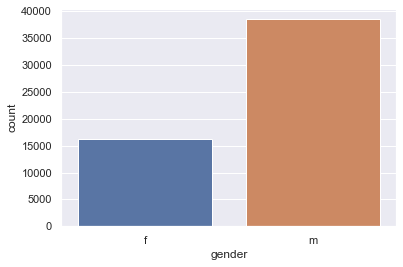

In [18]:
sns.set(rc={'figure.figsize':(6,4)})
sns.countplot(x="gender", data=df)

<AxesSubplot:xlabel='recruitment_channel', ylabel='count'>

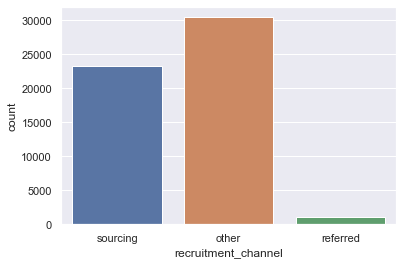

In [19]:
sns.set(rc={'figure.figsize':(6,4)})
sns.countplot(x="recruitment_channel", data=df)

<AxesSubplot:xlabel='no_of_trainings', ylabel='count'>

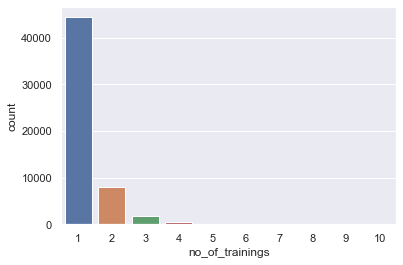

In [20]:
sns.set(rc={'figure.figsize':(6,4)})
sns.countplot(x="no_of_trainings", data=df)

<AxesSubplot:xlabel='previous_year_rating', ylabel='count'>

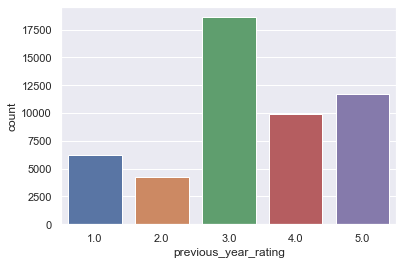

In [21]:
sns.countplot(x="previous_year_rating", data=df)

In [22]:
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,49.0,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,60.0,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,50.0,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,50.0,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,73.0,0


<AxesSubplot:xlabel='age', ylabel='Density'>

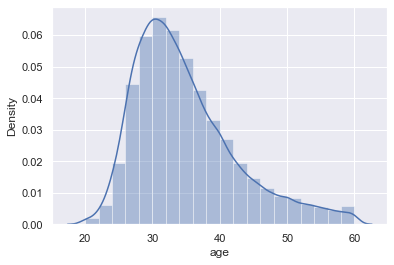

In [23]:
sns.distplot(df['age'],bins=20,kde=True)

<AxesSubplot:xlabel='length_of_service'>

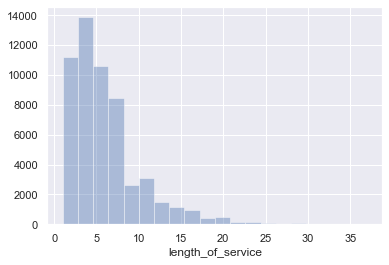

In [24]:
sns.distplot(df['length_of_service'],bins=20,kde=False)

<AxesSubplot:xlabel='avg_training_score', ylabel='Density'>

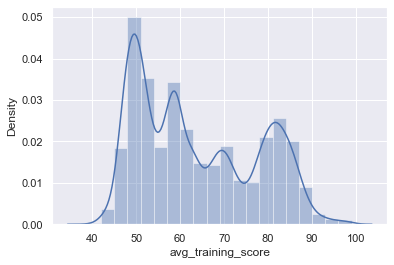

In [25]:
sns.distplot(df['avg_training_score'],bins=20,kde=True)

In [26]:
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,49.0,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,60.0,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,50.0,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,50.0,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,73.0,0


<AxesSubplot:xlabel='department', ylabel='count'>

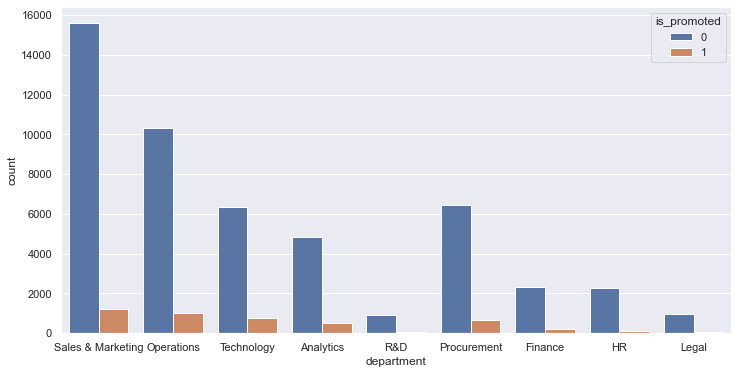

In [27]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x="department", data=df, hue='is_promoted')

<AxesSubplot:xlabel='department', ylabel='count'>

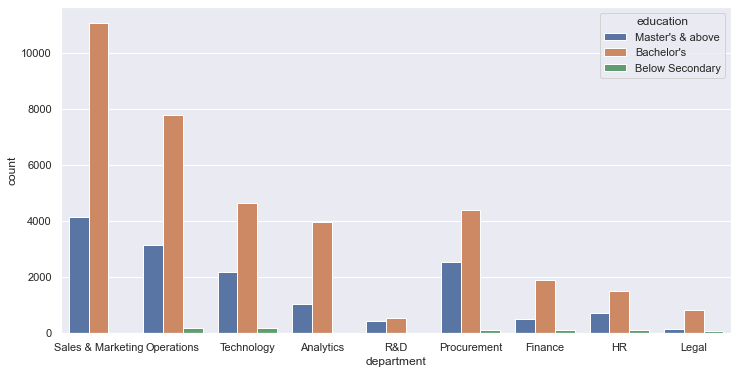

In [28]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x="department", data=df, hue='education')

<AxesSubplot:xlabel='recruitment_channel', ylabel='count'>

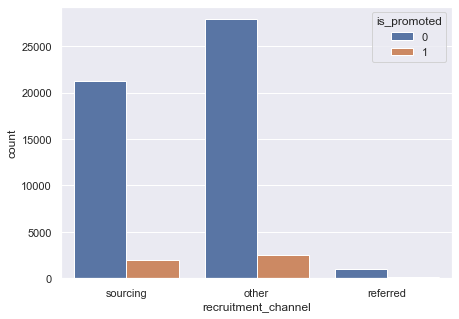

In [29]:
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(x="recruitment_channel", data=df, hue='is_promoted')

<AxesSubplot:xlabel='age', ylabel='count'>

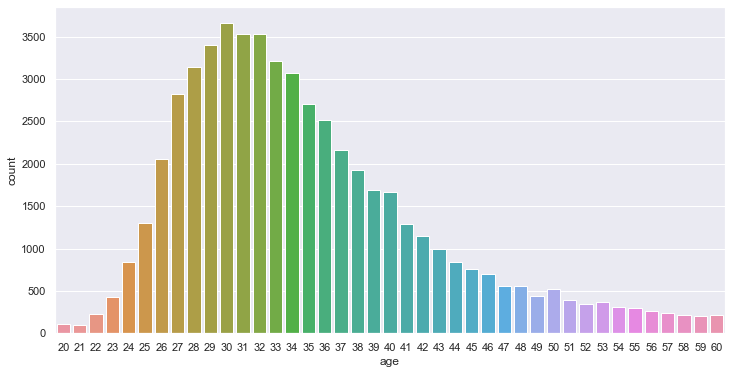

In [30]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x="age", data=df)

In [31]:
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,49.0,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,60.0,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,50.0,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,50.0,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,73.0,0


<AxesSubplot:xlabel='no_of_trainings', ylabel='count'>

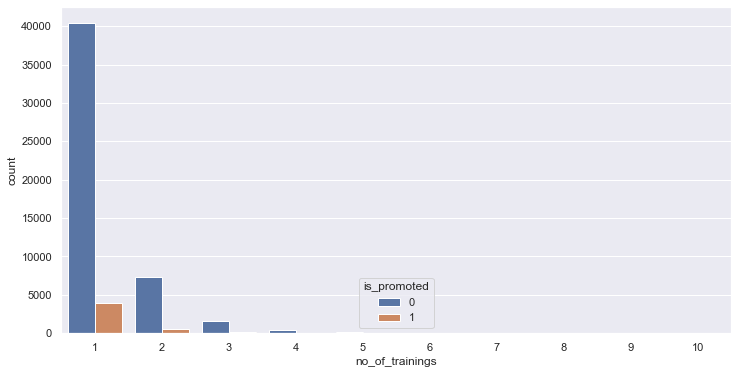

In [32]:
sns.countplot(x="no_of_trainings", data=df, hue='is_promoted')

<AxesSubplot:xlabel='previous_year_rating', ylabel='count'>

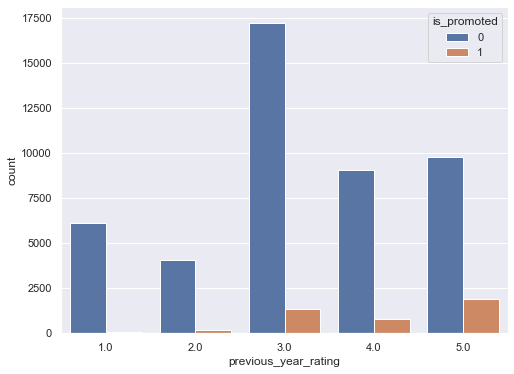

In [33]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(x="previous_year_rating", data=df, hue='is_promoted')

In [34]:
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,49.0,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,60.0,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,50.0,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,50.0,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,73.0,0


<AxesSubplot:xlabel='education', ylabel='count'>

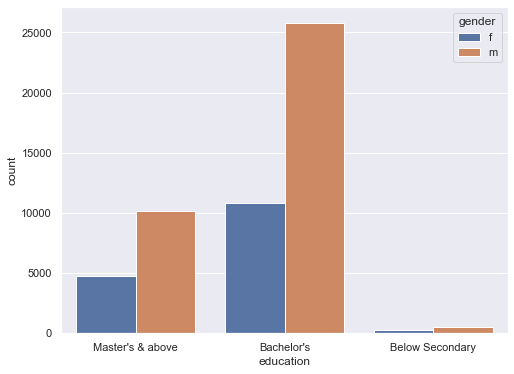

In [35]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(x="education", data=df, hue='gender')

## Data cleaning

#### Dataset consist of inconsist data, null values have to be cleared, categrorical data has to be converted to numerical data.

### Filling na values

In [36]:
df['age'].fillna(df['age'].median(), inplace=True )
df['previous_year_rating'].fillna(df['previous_year_rating'].median(), inplace=True )
df['avg_training_score'].fillna(df['avg_training_score'].median(), inplace=True )

In [37]:
df.isna().sum()

department                 0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
avg_training_score         0
is_promoted                0
dtype: int64

In [38]:
df.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

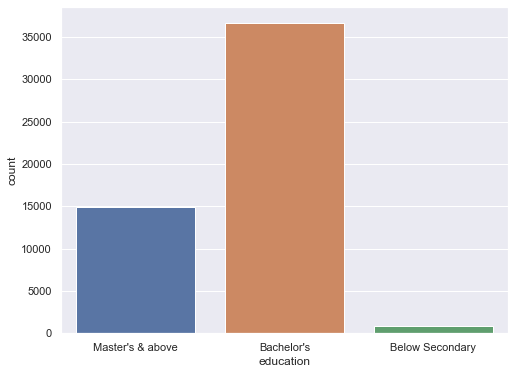

In [39]:
sns.countplot(x="education", data=df)

<AxesSubplot:xlabel='education', ylabel='count'>

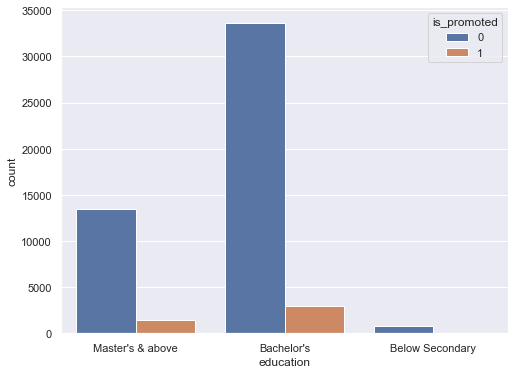

In [40]:
sns.countplot(x="education", data=df, hue="is_promoted")

### As the "below secondary promoted and not promoted values are much lesser than compared we are gonna compile it to the bachelor's education

In [41]:
# 1 for masters degree and 0 for others
df["education"] = [1 if x == "Master's & above" else 0 for x in df['education']]

In [42]:
df.education.head()

0    1
1    0
2    0
3    0
4    0
Name: education, dtype: int64

In [43]:
# Education null data is cleaned
df.isna().sum()

department              0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
avg_training_score      0
is_promoted             0
dtype: int64

In [44]:
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted
0,Sales & Marketing,1,f,sourcing,1,35,5.0,8,49.0,0
1,Operations,0,m,other,1,30,5.0,4,60.0,0
2,Sales & Marketing,0,m,sourcing,1,34,3.0,7,50.0,0
3,Sales & Marketing,0,m,other,2,39,1.0,10,50.0,0
4,Technology,0,m,other,1,45,3.0,2,73.0,0


In [45]:
# 0 for female 1 for male
df["gender"] = [0 if x == "f" else 1 for x in df['gender']]

In [46]:
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted
0,Sales & Marketing,1,0,sourcing,1,35,5.0,8,49.0,0
1,Operations,0,1,other,1,30,5.0,4,60.0,0
2,Sales & Marketing,0,1,sourcing,1,34,3.0,7,50.0,0
3,Sales & Marketing,0,1,other,2,39,1.0,10,50.0,0
4,Technology,0,1,other,1,45,3.0,2,73.0,0


## converting float values to int values

In [47]:
df["previous_year_rating"] = [int(x) for x in df['previous_year_rating']]
df["avg_training_score"] = [int(x) for x in df['avg_training_score']]

In [48]:
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted
0,Sales & Marketing,1,0,sourcing,1,35,5,8,49,0
1,Operations,0,1,other,1,30,5,4,60,0
2,Sales & Marketing,0,1,sourcing,1,34,3,7,50,0
3,Sales & Marketing,0,1,other,2,39,1,10,50,0
4,Technology,0,1,other,1,45,3,2,73,0


## Converting categorical to numerical values

In [49]:
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted
0,Sales & Marketing,1,0,sourcing,1,35,5,8,49,0
1,Operations,0,1,other,1,30,5,4,60,0
2,Sales & Marketing,0,1,sourcing,1,34,3,7,50,0
3,Sales & Marketing,0,1,other,2,39,1,10,50,0
4,Technology,0,1,other,1,45,3,2,73,0


### As of now we have "department" and "recruitment_channel" as categorical data, using pandas get_dummies we encode them to numerical

In [50]:
edu_dummies = pd.get_dummies(df['department'])
rec_dummies = pd.get_dummies(df['recruitment_channel'])

In [51]:
edu_dummies.head()

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1


In [52]:
frames = [df,edu_dummies,rec_dummies]

In [53]:
results = pd.concat(frames,axis=1)

In [54]:
results = results.drop(['department','recruitment_channel'], axis=1)

In [55]:
results.head()

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,other,referred,sourcing
0,1,0,1,35,5,8,49,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,1,1,30,5,4,60,0,0,0,0,0,1,0,0,0,0,1,0,0
2,0,1,1,34,3,7,50,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0,1,2,39,1,10,50,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0,1,1,45,3,2,73,0,0,0,0,0,0,0,0,0,1,1,0,0


## Performing data balancing and much more ...

## lets divide the dataset into X and Y

In [56]:
X = results.drop(['is_promoted'], axis=1)
y = results['is_promoted']

In [57]:
X.head()

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,other,referred,sourcing
0,1,0,1,35,5,8,49,0,0,0,0,0,0,0,1,0,0,0,1
1,0,1,1,30,5,4,60,0,0,0,0,1,0,0,0,0,1,0,0
2,0,1,1,34,3,7,50,0,0,0,0,0,0,0,1,0,0,0,1
3,0,1,2,39,1,10,50,0,0,0,0,0,0,0,1,0,1,0,0
4,0,1,1,45,3,2,73,0,0,0,0,0,0,0,0,1,1,0,0


In [58]:
y.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

### As we can see the imbalance in the dataset which will harm the machine model at the end, we have to balance this dataset

<AxesSubplot:ylabel='is_promoted'>

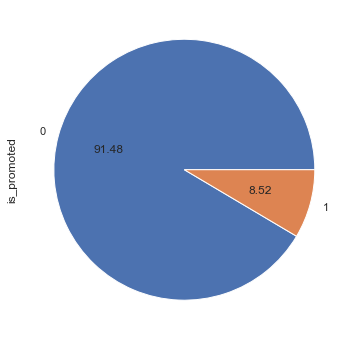

In [59]:
y.value_counts().plot.pie(autopct='%.2f')

### There are more number of not_promoted classes, as thus the data is imbalanced. So there are two ways in which we can counter this situation
#### 1. Under Sampling (involved reducing the higher class to lower class values) 
#### 2. Over Sampling(increasing the underclass values to the upper values)

### Under Sampling

<AxesSubplot:ylabel='is_promoted'>

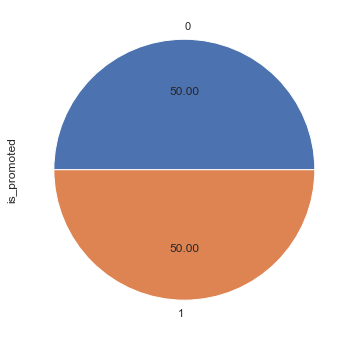

In [60]:
from imblearn.under_sampling import RandomUnderSampler

rad_und_sam = RandomUnderSampler(sampling_strategy=1)
X_res,y_res = rad_und_sam.fit_resample(X,y)

y_res.value_counts().plot.pie(autopct='%.2f')

In [61]:
y_res.value_counts()

0    4668
1    4668
Name: is_promoted, dtype: int64

In [62]:
print("length of dataset after undersampling")
print(len(X_res),len(y_res))

length of dataset after undersampling
9336 9336


In [63]:
X_res.head()

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,other,referred,sourcing
0,0,0,1,31,3,5,67,0,0,0,0,1,0,0,0,0,0,0,1
1,1,1,1,40,3,2,53,0,0,0,0,0,0,0,1,0,1,0,0
2,0,1,1,26,1,5,47,0,0,0,0,0,0,0,1,0,1,0,0
3,1,1,1,48,4,17,67,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,1,35,5,7,60,0,0,0,0,1,0,0,0,0,0,0,1


## Over sampling

<AxesSubplot:ylabel='is_promoted'>

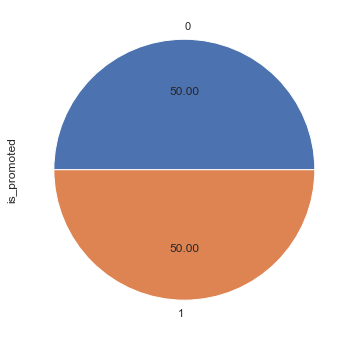

In [64]:
from imblearn.over_sampling import RandomOverSampler

rad_ovr_sam = RandomOverSampler(sampling_strategy=1)
X_ros,y_ros = rad_ovr_sam.fit_resample(X,y)

y_ros.value_counts().plot.pie(autopct='%.2f')

In [65]:
y_ros.value_counts()

0    50140
1    50140
Name: is_promoted, dtype: int64

## decision tree


In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.30, random_state=42)

dt_os = DecisionTreeClassifier(criterion = "entropy",random_state = 100,max_depth=3, min_samples_leaf=5)
dt_os.fit(X_train, y_train)

y_pred = dt_os.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report

print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))

print("Report : ",classification_report(y_test, y_pred))

print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)


Confusion Matrix: 
 [[12087  3099]
 [ 7621  7277]]
Report :                precision    recall  f1-score   support

           0       0.61      0.80      0.69     15186
           1       0.70      0.49      0.58     14898

    accuracy                           0.64     30084
   macro avg       0.66      0.64      0.63     30084
weighted avg       0.66      0.64      0.63     30084

Accuracy :  64.36644063289457


### Hyperparameter tuning the decision tree

In [70]:
from sklearn.model_selection import RandomizedSearchCV

In [118]:
parameters = {'max_depth': (10,30,50,70,90,100),
              'criterion': ('gini','entropy'),
              'max_depth': (3,5,7,9,10),
              'max_features': ('auto', 'sqrt', 'log2'),
              'min_samples_split': (2,4,6)
             }



In [72]:
DT_grid = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=parameters, cv=5, verbose=True)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=42)
DT_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 10),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

In [74]:
DT_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2')

In [75]:
model = DecisionTreeClassifier(criterion = "entropy",random_state = 100,max_depth=9, min_samples_split=6, max_features='sqrt')
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features='sqrt',
                       min_samples_split=6, random_state=100)

In [76]:
print(f'Train Accurary - : {model.score(X_train, y_train):.3f}')
print(f'Test Accurary - : {model.score(X_test, y_test):.3f}')

Train Accurary - : 0.686
Test Accurary - : 0.652


In [77]:
y_pred = model.predict(X_test)

In [119]:
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))

print("Report : ",classification_report(y_test, y_pred))

print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)


dts_accuracy = (accuracy_score(y_test,y_pred)*100)

Confusion Matrix: 
 [[1108  283]
 [ 564  846]]
Report :                precision    recall  f1-score   support

           0       0.66      0.80      0.72      1391
           1       0.75      0.60      0.67      1410

    accuracy                           0.70      2801
   macro avg       0.71      0.70      0.69      2801
weighted avg       0.71      0.70      0.69      2801

Accuracy :  69.76079971438772


# Neural network

#### For the given dataset, as seen in the previous model, we have tried the model both on under sampled and over sampled data. and the results were varied. So as the over sampled is much larger compaired to the other one. So for the next few models we will use over sampled dataset. Larfer the dataset better for the machine to train.

In [79]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import adam_v2
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers

In [80]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6535 entries, 4022 to 7270
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   education             6535 non-null   int64
 1   gender                6535 non-null   int64
 2   no_of_trainings       6535 non-null   int64
 3   age                   6535 non-null   int64
 4   previous_year_rating  6535 non-null   int64
 5   length_of_service     6535 non-null   int64
 6   avg_training_score    6535 non-null   int64
 7   Analytics             6535 non-null   uint8
 8   Finance               6535 non-null   uint8
 9   HR                    6535 non-null   uint8
 10  Legal                 6535 non-null   uint8
 11  Operations            6535 non-null   uint8
 12  Procurement           6535 non-null   uint8
 13  R&D                   6535 non-null   uint8
 14  Sales & Marketing     6535 non-null   uint8
 15  Technology            6535 non-null   uint8
 16  oth

## Using the keras tuner lets understand how many layers are required to build a model

In [81]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model.add(layers.Dense(units=hp.Int('units_'+str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                              activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2,1e-3,1e-4])),
        loss='binary_crossentropy',
        metrics='accuracy')
    return model

In [82]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=3,
    directory='project1',
    project_name='mldm cw'
)

INFO:tensorflow:Reloading Oracle from existing project project1/mldm cw/oracle.json
INFO:tensorflow:Reloading Tuner from project1/mldm cw/tuner0.json


2022-05-31 13:36:08.139805: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [83]:
tuner.search_space_summary()

Search space summary
Default search space size: 8
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.30, random_state=42)

In [85]:
len(X_train)
len(y_train)

70196

### standadizing the data and feeding the data to the NN model

In [86]:
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

scaled_data = scale.fit_transform(X_train) 
scaled_test_data = scale.transform(X_test)

In [87]:
tuner.search(scaled_data, y_train, epochs=5, validation_data=(scaled_test_data, y_test))

INFO:tensorflow:Oracle triggered exit


In [88]:
for h_param in [f"units_{i}" for i in range(1,4)] + ['learning_rate']:
  print(h_param, tuner.get_best_hyperparameters()[0].get(h_param))

units_1 320
units_2 32
units_3 32
learning_rate 0.001


In [89]:
best_model = tuner.get_best_models()[0]
best_model.build(X_train.shape)
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (70196, 384)              7680      
                                                                 
 dense_1 (Dense)             (70196, 320)              123200    
                                                                 
 dense_2 (Dense)             (70196, 32)               10272     
                                                                 
 dense_3 (Dense)             (70196, 32)               1056      
                                                                 
 dense_4 (Dense)             (70196, 1)                33        
                                                                 
Total params: 142,241
Trainable params: 142,241
Non-trainable params: 0
_________________________________________________________________


In [90]:
best_model.fit(
    X_train, 
    y_train,
    epochs=20,
    batch_size=64
)

Epoch 1/20
1097/1097 [==============================] - 5s 4ms/step - loss: 2.6071 - accuracy: 0.5829
Epoch 2/20
1097/1097 [==============================] - 4s 4ms/step - loss: 0.6542 - accuracy: 0.6123
Epoch 3/20
1097/1097 [==============================] - 4s 4ms/step - loss: 0.6372 - accuracy: 0.6303
Epoch 4/20
1097/1097 [==============================] - 4s 4ms/step - loss: 0.6161 - accuracy: 0.6477
Epoch 5/20
1097/1097 [==============================] - 4s 4ms/step - loss: 0.5979 - accuracy: 0.6617
Epoch 6/20
1097/1097 [==============================] - 4s 3ms/step - loss: 0.5880 - accuracy: 0.6699
Epoch 7/20
1097/1097 [==============================] - 4s 3ms/step - loss: 0.5779 - accuracy: 0.6778
Epoch 8/20
1097/1097 [==============================] - 4s 3ms/step - loss: 0.5698 - accuracy: 0.6834
Epoch 9/20
1097/1097 [==============================] - 4s 4ms/step - loss: 0.5625 - accuracy: 0.6874
Epoch 10/20
1097/1097 [==============================] - 4s 4ms/step - loss: 0.560

In [120]:
# predict probabilities for test set
yhat_probs = best_model.predict(X_test, verbose=0)
yhat_probs = [1 if x >= 0.50 else 0 for x in yhat_probs]


In [121]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, yhat_probs)
mlp_accuracy = accuracy*100
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_probs)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_probs)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_probs)
print('F1 score: %f' % f1)
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)

Accuracy: 0.496608
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000
ROC AUC: 0.500000


# SVM

# SVM for Over sampling data

In [93]:
# Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=0)

In [94]:
print("Training data : ", X_train.shape)
print("Testing data : ", X_test.shape)

Training data :  (6535, 19)
Testing data :  (2801, 19)


In [95]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
stand_X = StandardScaler()
X_train = stand_X.fit_transform(X_train)
X_test = stand_X.transform(X_test)

# using SVM poly kernel

In [96]:
from sklearn.svm import SVC
svm_cls_li = SVC(kernel = 'linear', random_state = 0)
svm_cls_li.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [97]:
# prediction using the test set
y_pred = svm_cls_li.predict(X_test)

y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [98]:
# printing the confusion matrix and getting the accuracy value
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))

print("Report : ",classification_report(y_test, y_pred))

print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)

Confusion Matrix:  [[1100  291]
 [ 560  850]]
Report :                precision    recall  f1-score   support

           0       0.66      0.79      0.72      1391
           1       0.74      0.60      0.67      1410

    accuracy                           0.70      2801
   macro avg       0.70      0.70      0.69      2801
weighted avg       0.70      0.70      0.69      2801

Accuracy :  69.61799357372367


### RBF model

In [99]:
# RBF kernel
svm_cls_rbf = SVC(kernel = 'rbf')
svm_cls_rbf.fit(X_train, y_train)

SVC()

In [100]:
y_pred = svm_cls_rbf.predict(X_test)

In [101]:
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [102]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))

print("Report : ",classification_report(y_test, y_pred))

print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)

Confusion Matrix:  [[1123  268]
 [ 585  825]]
Report :                precision    recall  f1-score   support

           0       0.66      0.81      0.72      1391
           1       0.75      0.59      0.66      1410

    accuracy                           0.70      2801
   macro avg       0.71      0.70      0.69      2801
weighted avg       0.71      0.70      0.69      2801

Accuracy :  69.54659050339164


## Polynomial model

In [103]:
svm_cls_poly = SVC(kernel='poly', degree=1)
svm_cls_poly.fit(X_train, y_train)

SVC(degree=1, kernel='poly')

In [104]:
y_pred = svm_cls_poly.predict(X_test)

In [122]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))

print("Report : ",classification_report(y_test, y_pred))

print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)

svm_acc = accuracy_score(y_test,y_pred)*100

Confusion Matrix:  [[1108  283]
 [ 564  846]]
Report :                precision    recall  f1-score   support

           0       0.66      0.80      0.72      1391
           1       0.75      0.60      0.67      1410

    accuracy                           0.70      2801
   macro avg       0.71      0.70      0.69      2801
weighted avg       0.71      0.70      0.69      2801

Accuracy :  69.76079971438772


## Compairing the accuracy of model over different dataset

In [123]:
print(dts_accuracy, mlp_accuracy, svm_acc)

69.76079971438772 49.66083541592288 69.76079971438772


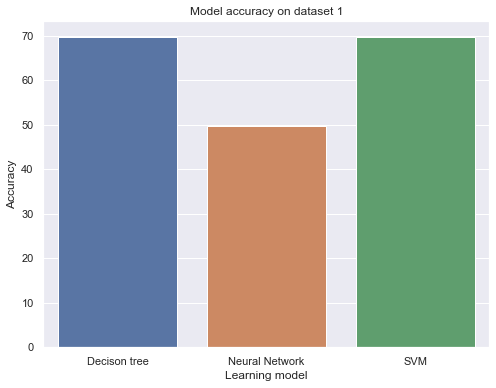

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

x = ['Decison tree', 'Neural Network', 'SVM']
y = [dts_accuracy, mlp_accuracy, svm_acc]

plt.xlabel("Learning model")
plt.ylabel("Accuracy")
plt.title("Model accuracy on dataset 1")

sns.barplot(x, y)
plt.show()

## Logic based learning algorithm on the dataset is perfomed in the other file names "logic_based_model".

## Reinforcement learning is in the separate file named "reinforcement learning"
## Reinforcement learning is developed using Open AI Gym, by creating its ENV